In [34]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torch.nn.utils.rnn import pad_sequence, pack_sequence
import torch

In [2]:
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.preprocessing.sql_handling.execute_sql import execute_sql_pandas
from global_config import *

In [4]:
query = """SELECT filename,
video_id,
emotion_1,
emotion_1_id,
frame,
success,
confidence,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r
FROM openface
WHERE mix = 0
AND video_id = 'A220';
"""
df, read_duration = execute_sql_pandas(query)

executing query: 
SELECT filename,
video_id,
emotion_1,
emotion_1_id,
frame,
success,
confidence,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r
FROM openface
WHERE mix = 0
AND video_id = 'A220';

done
Read duration: 42.248


In [5]:
df

,filename,video_id,emotion_1,emotion_1_id,frame,success,confidence,AU01_r,AU02_r,AU04_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A220_reg_p_2,A220,reg,0,1,1,1,0.00,0.0,2.10,...,1.22,0.00,1.64,0.00,0.52,0.0,0.74,0.40,0.42,0.00
1,A220_reg_p_2,A220,reg,0,2,1,1,0.00,0.0,2.11,...,1.01,0.00,1.72,0.15,0.29,0.0,0.64,0.41,0.37,0.10
2,A220_reg_p_2,A220,reg,0,3,1,1,0.00,0.0,2.06,...,0.88,0.00,1.74,0.15,0.20,0.0,0.59,0.46,0.27,0.10
3,A220_reg_p_2,A220,reg,0,4,1,1,0.00,0.0,2.06,...,0.90,0.00,1.70,0.12,0.27,0.0,0.61,0.42,0.22,0.09
4,A220_reg_p_2,A220,reg,0,5,1,1,0.00,0.0,2.03,...,0.87,0.00,1.72,0.10,0.27,0.0,0.59,0.48,0.35,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98333,A220_anx_v_3,A220,anx,34,306,1,1,0.01,0.0,0.62,...,1.37,0.61,2.10,0.00,0.78,0.0,0.95,0.03,0.00,0.00
98334,A220_anx_v_3,A220,anx,34,307,1,1,0.03,0.0,0.63,...,1.42,0.63,2.08,0.00,0.81,0.0,0.90,0.03,0.00,0.00
98335,A220_anx_v_3,A220,anx,34,308,1,1,0.03,0.0,0.55,...,1.46,0.64,2.03,0.00,0.83,0.0,0.80,0.02,0.00,0.00
98336,A220_anx_v_3,A220,anx,34,309,1,1,0.05,0.0,0.50,...,1.43,0.61,2.02,0.00,0.80,0.0,0.71,0.02,0.00,0.00


## Number of instances per emotion

Number of Instances per Emotion (before data cleaning)
ang        4116
sad        3643
disa       3352
neu        3287
hap        2877
rel        2625
fea        2621
awe        2559
sha        2552
conc       2524
reg        2501
gra        2383
env        2353
pri        2348
sat        2346
disg       2339
ple        2310
amu        2292
adm        2245
emb        2243
gui        2238
anx        2202
ele        2199
rej        2184
sex        2168
pea        2078
ins        2068
exc        2052
dou        2041
hop        2012
bor        1994
dist       1948
cont       1946
int        1834
mov        1782
conf       1666
nos        1665
neg_sur    1649
pos_sur    1611
sar        1598
scha       1594
tri        1554
ten        1421
det        1318
Name: emotion_1, dtype: int64


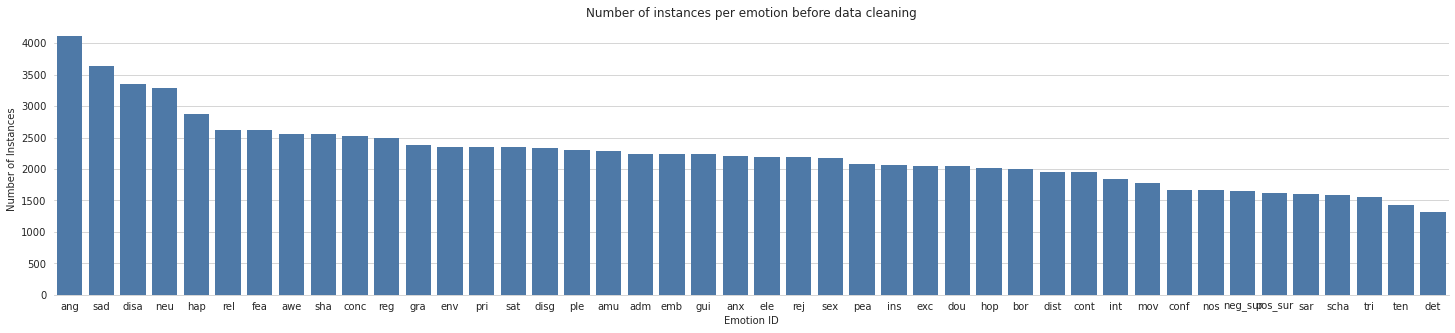

In [6]:
print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(25,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()

## Frame counts

Number of frames for every filename


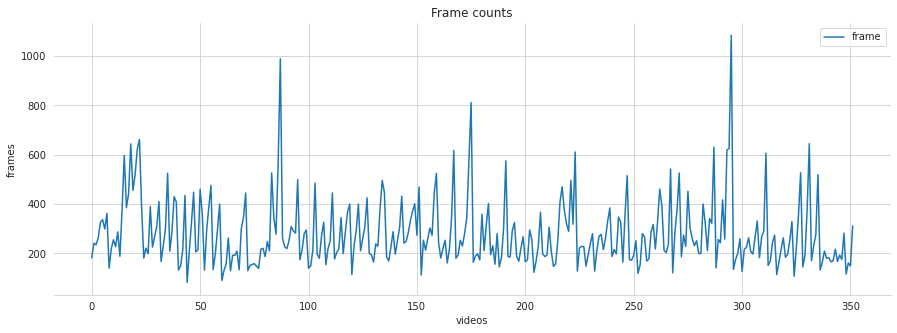

In [7]:
print("Number of frames for every filename")
frame_counts = df[['frame','filename']].groupby(["filename"]).frame.nunique().reset_index()
frame_counts.plot(figsize=(15,5))
plt.title("Frame counts")
plt.xlabel('videos')
plt.ylabel('frames')
plt.show()

## Frame counts density plot

Number of frames for every filename


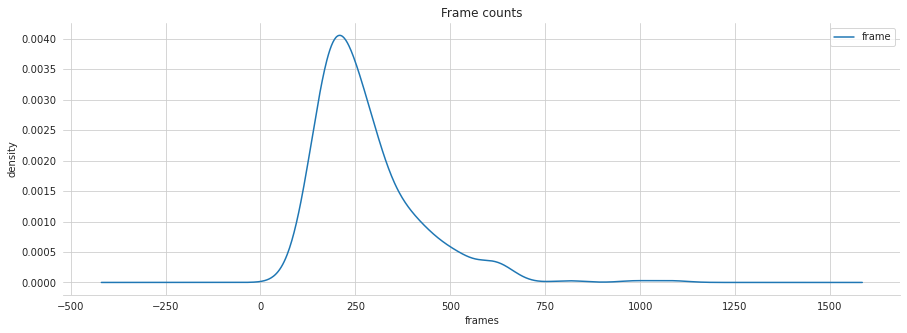

In [8]:
print("Number of frames for every filename")
frame_counts = df[['frame','filename']].groupby(["filename"]).frame.nunique().reset_index()
frame_counts.plot.density(figsize=(15,5))
plt.title("Frame counts")
plt.xlabel('frames')
plt.ylabel('density')
plt.show()

## Time series transformation

In [9]:
def time_series_to_list(df, identifier, x_cols, y_col):
    """
    :param df: pd.Dataframe
    :param identifier: which column to split time series by
    :param x_cols: column names for input features
    :param y_col: column name for labels
    :return: list with length = number of time series and every element of shape (number of frames, number of features)
    """
    x = []
    y = []
    for _, group in df.groupby(identifier):
        x_arr = np.array(group[x_cols].values)
        x.append(x_arr)

        y_val = group[[y_col]].values[0][0]
        y.append(y_val)
    return x, y


In [10]:
def pad_list_of_series(ts_list):
    """
    :param ts_list: a list of time series where every element has shape (number of frames, number of features)
    :return: np.array where every element in the series has been padded with zeros and then transformed into a matrix
                with shape (number of time series, number of frames, number of features)
    """
    # obtain the longest element in the list
    length = max(map(len, ts_list))

    padded_list = []
    for series in ts_list:
        # create an empty np array of appropriate size
        pad = np.zeros((length-len(series), series.shape[1]))

        # concat with series and transpose in order to
        series = np.concatenate((series, pad))

        padded_list.append(series)

    return np.asarray(padded_list)

In [11]:
X, y = time_series_to_list(df, "filename", AU_INTENSITY_COLS, TARGET_COLUMN)

In [15]:
len(X)

352

In [14]:
X[0].shape

(182, 17)

In [22]:
X_torch = []
for i in X:
    i = torch.tensor(i)
    X_torch.append(i)

In [25]:
len(X_torch)

352

In [24]:
X_torch[0].shape

torch.Size([182, 17])

In [27]:
X_pad = pad_sequence(X_torch, batch_first=True)

In [29]:
X_pad.shape

torch.Size([352, 1084, 17])

In [30]:
X_pad_np = np.array(X_pad)

In [36]:
X_pack = pack_sequence(X_torch, enforce_sorted=False)

In [42]:
X_pack.data.size()

torch.Size([98338, 17])

In [12]:
X = pad_list_of_series(X)

The shape of x is (number of times series, number of frames (plus padding), number of features)

In [13]:
X.shape

(352, 1084, 17)

In [14]:
y = np.array(y)
y.shape

(352,)

## Save file

In [15]:
out = os.path.join(ROOT_DIR, "files/out/low_level/video_time_series_data_A220")
np.savez_compressed(out, X=X, y=y)